1.Packages

First, let's run the cell below to import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.

matplotlib is a famous library to plot graphs in Python.

utils.py contains helper functions for this assignment. You do not need to modify code in this file.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

2.Logistic Regression

you will build a logistic regression model to predict whether a student gets admitted into a university.

2.1 Loading and visualizing the data

The load_dataset() function shown below loads the data into variables X_train and y_train

X_train contains exam scores on two exams for a student

y_train is the admission decision
y_train = 1 if the student was admitted
y_train = 0 if the student was not admitted
Both X_train and y_train are numpy arrays.

In [11]:
# load dataset
X_train, y_train = load_data('C:/Users/Parshuram/Downloads/ex2data1.txt')

In [12]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [13]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [14]:
#Check the dimensions of your variables
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


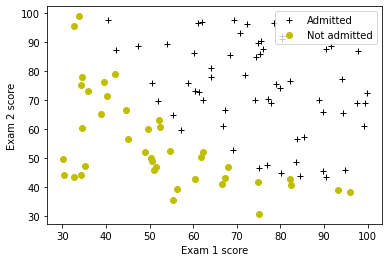

In [15]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

2.2 Sigmoid function
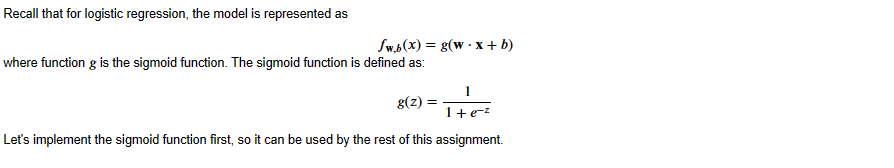

In [17]:

#  sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    # g = 1 / (1 + math.e ** (-z))
    g = 1 / (1 + np.exp(-z))
    return g
    ### END SOLUTION ###  
    
    return g

In [18]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


2.3 Cost function for logistic regression
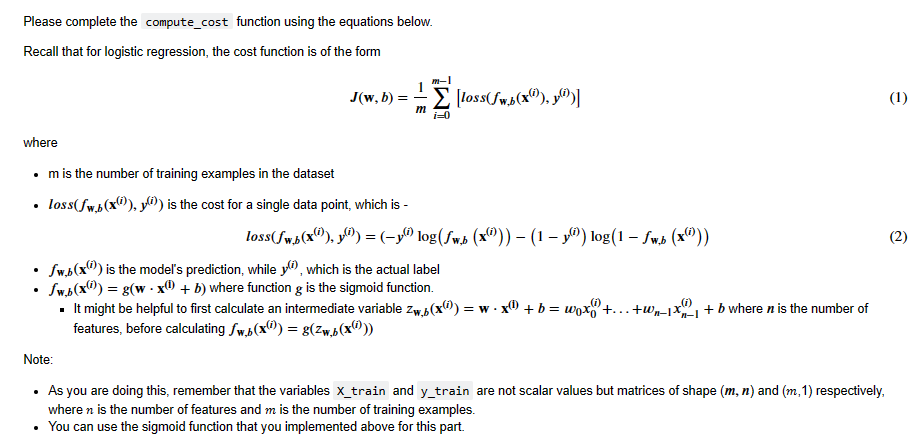


In [19]:
# compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    cost = 0
    ### START CODE HERE ###
    for i in range (m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        loss = -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
        cost += loss
    
    total_cost = cost / m
    ### END CODE HERE ### 

    return total_cost

In [20]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [22]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.218


2.4 Gradient for logistic regression

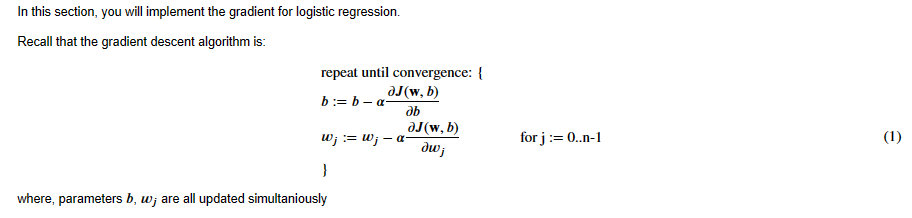

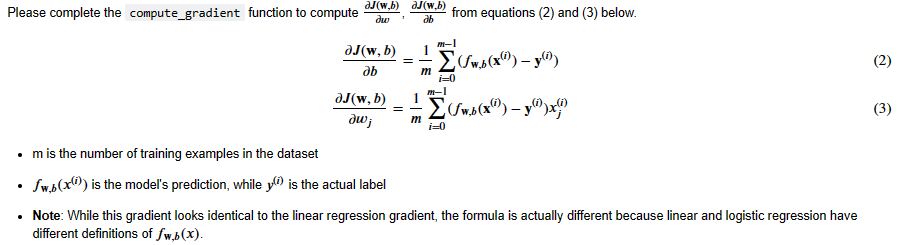

In [23]:
#  compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j] * X[i, j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (f_wb - y[i]) * X[i, j]
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ###
        
    return dj_db, dj_dw

In [24]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [25]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


2.5 Learning parameters using gradient descent

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent.


A good way to verify that gradient descent is working correctly is to look at the value of  𝐽(𝐰,𝑏)
  and check that it is decreasing with each step.

Assuming you have implemented the gradient and computed the cost correctly, your value of  𝐽(𝐰,𝑏)
  should never increase, and should converge to a steady value by the end of the algorithm.


In [26]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [27]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


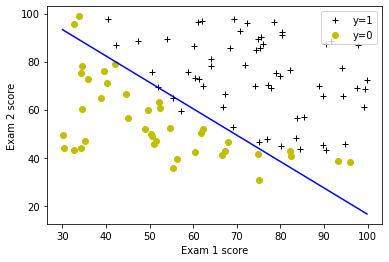

In [28]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

2.6 Evaluating logistic regression

Please complete the predict function to produce 1 or 0 predictions given a dataset and a learned parameter vector  𝑤
  and  𝑏
 .

First you need to compute the prediction from the model  𝑓(𝑥(𝑖))=𝑔(𝑤⋅𝑥(𝑖)+𝑏)
  for every example

You've implemented this before in the parts above
We interpret the output of the model ( 𝑓(𝑥(𝑖))
 ) as the probability that  𝑦(𝑖)=1
  given  𝑥(𝑖)
  and parameterized by  𝑤
 .

Therefore, to get a final prediction ( 𝑦(𝑖)=0
  or  𝑦(𝑖)=1
 ) from the logistic regression model, you can use the following heuristic -

if  𝑓(𝑥(𝑖))>=0.5
 , predict  𝑦(𝑖)=1
 
if  𝑓(𝑥(𝑖))<0.5
 , predict  𝑦(𝑖)=0

In [29]:
# predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i, j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb >= 0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [30]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


In [34]:
# Using Sklearn libray
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming X_train and y_train are already defined and loaded as shown in your notebook
#load dataset
X_train, y_train = load_data('C:/Users/Parshuram/Downloads/ex2data1.txt')

# Convert X_train and y_train to numpy arrays if they are not already, for compatibility with sklearn
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the data into training and testing sets for a fair evaluation
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train_split, y_train_split)

# Predict on the testing set
y_pred = model.predict(X_test_split)

# Calculate accuracy
accuracy = accuracy_score(y_test_split, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_split, y_pred)
recall = recall_score(y_test_split, y_pred)
f1 = f1_score(y_test_split, y_pred)

# Output the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Accuracy: 0.8
Precision: 0.9
Recall: 0.75
F1 Score: 0.8181818181818182


Precision: 0.9 (or 90%)

Definition: Precision measures the proportion of positive predictions that were actually correct. It is calculated as the number of true positives divided by the number of true positives plus the number of false positives.

Interpretation: When your model predicts a positive class, it is correct 90% of the time.

Recall: 0.75 (or 75%)

Definition: Recall (also known as sensitivity) measures the proportion of actual positives that were correctly identified by the model. It is calculated as the number of true positives divided by the number of true positives plus the number of false negatives.

Interpretation: Your model correctly identifies 75% of all actual positive cases.

F1 Score: 0.8181 (approximately 81.82%)

Definition: The F1 score is the harmonic mean of precision and recall, offering a balance between them. It provides a single metric that summarizes the model's ability to not falsely label negatives as positives (precision) and its ability to find all the positive samples (recall).
